# Cross validation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

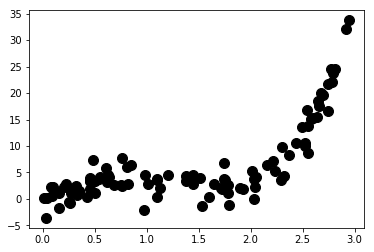

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,2).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [3]:
x=np.vstack(x)

# k-fold

In [4]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [5]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.657493472196
0.7445851281
0.75016400744
[0.65749347219577947, 0.74458512810006616, 0.750164007440143]


In [6]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.65749347219577947, 0.74458512810006616, 0.750164007440143]

# cross_val_score

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([ 0.65749347,  0.74458513,  0.75016401])

In [8]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([ 0.65749347,  0.74458513,  0.75016401])

In [9]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-2.7087962 , -2.56326345, -2.80136808])

# cross_val_predict

In [10]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([  8.11758475,  15.80915505,   0.7839454 ,   4.98159757,
         3.18980564,   6.86399002,   2.26482654,   0.78252623,
         0.89871646,   5.35078585,   5.41974344,   2.13698563,
         9.71243491,  11.85622986,  12.05417687,   1.5495568 ,
         3.79182158,   1.02451154,   8.17053372,   6.55681514,
        19.50574233,   8.38507747,   4.75434808,  17.76247064,
        14.88273234,  16.38286113,   1.12779769,   2.56878397,
         0.82400956,  10.60646209,  15.46122113,  10.88860704,
        20.93931594,   4.29931043,   3.33464302,   5.06018924,
        11.92072476,   3.92254978,   2.08523036,  15.19150968,
         4.00239487,   1.05443182,   0.34384815,   1.93968061,
         1.65067617,   4.27525965,  16.84728418,   3.03564968,
        18.17832867,  19.19187846,  22.97077203,   1.95272175,
         3.83812286,   7.10745774,   2.67638698,   1.31291469,
         3.26504163,   5.16064134,   0.65844133,  20.09427709,
         5.69693168,   0.59246004,   3.74435811,  10.70

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich.


In [13]:
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

kf = KFold(n_splits=3)
kf.get_n_splits(x)

for name, model in models:
    print(name)
    #cross_val_score(model, x, y, cv=kf)
    print("Score: {}".format( cross_val_score(model, x, y, cv=kfold) ))
    print("Maen score: {}".format( np.mean(cross_val_score(model, x, y, cv=kfold)) ))

LR
Score: [ 0.2341146   0.5468112   0.53503823]
Maen score: 0.4386546758794692
PR2
Score: [ 0.65749347  0.74458513  0.75016401]
Maen score: 0.717414202578663
PR3
Score: [ 0.92790448  0.89021848  0.94075758]
Maen score: 0.9196268446197898
PR4
Score: [ 0.92492879  0.90194492  0.94082189]
Maen score: 0.9225652013209173
PR5
Score: [ 0.9165135   0.89319082  0.94037961]
Maen score: 0.9166946441492655
PR6
Score: [ 0.91736678  0.88619354  0.93879795]
Maen score: 0.9141194186724159
PR25
Score: [ 0.74661774  0.66821116 -0.32790041]
Maen score: 0.362309498018952
